<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
suppressMessages(
    library(quantstrat)
)
options("width"=120)

In [2]:
GAZP <- read.csv('../gazp.csv')
GAZP$Date <- as.POSIXct(strptime(GAZP$Date, format="%Y-%m-%d %H:%M:%S"))
GAZP <- as.xts(GAZP[c("Open","High","Low","Close","Volume")], order.by=GAZP$Date)
GAZP <- GAZP[1:150]

symbols <- c('GAZP')
currency("RUB")
stock(symbols, 'RUB')
initDate <- "2007-01-01"
initEq <- 1e5
nm <- "BBANDS"

initPortf(nm, symbols = symbols, curr="RUB")
initAcct(nm, nm, initEq = initEq, curr = "RUB")
initOrders(nm, symbols = symbols)

st <- 'bbands'
strategy(st, store=TRUE)

[1] "RUB"

[1] "GAZP"

[1] "BBANDS"

[1] "BBANDS"

In [3]:
fee <- function(TxnQty, TxnPrice, Symbol, pct=.0003) {
  # A function for computing a transaction fee that is 2% of total value of
  # transaction
  #
  # Args:
  #   TxnQty: Numeric for number of shares being traded
  #   TxnPrice: Numeric for price per share
  #   Symbol: The symbol being traded (not used here, but will be passed)
  #
  # Returns:
  #   The fee to be applied
  
  return(-pct * abs(TxnQty * TxnPrice))
}

In [4]:
add.indicator(
    strategy = st,
    name = 'BBands',
    arguments = list(HLC=quote(Cl(mktdata))),
#     arguments = list(HLC=quote(HLC(mktdata))),
    label='BBands',
    store=TRUE
)

#enter long
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("Close", "dn.BBands"),relationships="gt"),
    label="Cl.gt.dn",
    store=TRUE
)

#exit long
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("Close", "mavg.BBands"),relationship="gt"),
    label="Cl.gt.mid",
    store=TRUE
)

#exit long
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("dn.BBands", "Close"),relationships="gt"),
    label="Cl.lt.dn",
    store=TRUE
)  

#enter short
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("up.BBands", "Close"),relationships="gt"),
    label="Cl.lt.up",
    store=TRUE
)

#exit short
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("mavg.BBands", "Close"),relationship="gt"),
    label="Cl.lt.mid",
    store=TRUE
)

#exit short
add.signal(
    strategy = st,
    name = "sigCrossover",
    arguments = list(columns=c("Close", "up.BBands"),relationship="gt"),
    label="Cl.gt.up",
    store=TRUE
)
        
#enter long
add.rule(strategy = st,
         name = 'ruleSignal',
         arguments = list(sigcol="Cl.gt.dn",
                          sigval=TRUE,
                          orderqty=100,
                          ordertype='market',
                          orderside=NULL,
                          TxnFees = "fee"
                         ),
         type='enter', path.dep=TRUE, store=TRUE)

#exit long
add.rule(strategy = st,
         name='ruleSignal',
         arguments=list(sigcol="Cl.gt.mid",
                        sigval=TRUE,
                        orderqty= 'all',
                        ordertype='market',
                        orderside=NULL,
                        TxnFees = "fee"
                       ),
         type='exit', path.dep=TRUE, store=TRUE)

#exit long
add.rule(strategy = st,
         name='ruleSignal',
         arguments=list(sigcol="Cl.lt.dn",
                        sigval=TRUE,
                        orderqty= 'all',
                        ordertype='market',
                        orderside=NULL,
                        TxnFees = "fee"
                       ),
         type='exit', path.dep=TRUE, store=TRUE)

#enter short
add.rule(strategy = st,
         name = 'ruleSignal',
         arguments = list(sigcol="Cl.lt.up",
                          sigval=TRUE,
                          orderqty=-100,
                          ordertype='market',
                          orderside=NULL,
                          TxnFees = "fee"
                         ),
         type='enter', path.dep=TRUE, store=TRUE)

#exit short
add.rule(strategy = st,
         name='ruleSignal',
         arguments=list(sigcol="Cl.lt.mid",
                        sigval=TRUE,
                        orderqty= 'all',
                        ordertype='market',
                        orderside=NULL,
                        TxnFees = "fee"
                       ),
         type='exit', path.dep=TRUE, store=TRUE)

#exit short
add.rule(strategy = st,
         name='ruleSignal',
         arguments=list(sigcol="Cl.gt.up",
                        sigval=TRUE,
                        orderqty= 'all',
                        ordertype='market',
                        orderside=NULL,
                        TxnFees = "fee"
                       ),
         type='exit', path.dep=TRUE, store=TRUE)

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

In [5]:
SD = 2
N = 20
out <- applyStrategy(
    strategy = st,
    portfolios = nm,
    mktdata = GAZP,
    parameters = list(sd=SD, n=N)
)

[1] "2006-02-01 16:25:00 GAZP -100 @ 222.9"
[1] "2006-02-01 18:00:00 GAZP 100 @ 222.42"
[1] "2006-02-02 10:35:00 GAZP -100 @ 223.9"
[1] "2006-02-02 11:00:00 GAZP 100 @ 223"
[1] "2006-02-02 12:15:00 GAZP 100 @ 220.93"
[1] "2006-02-02 13:10:00 GAZP -100 @ 221.36"


In [6]:
updatePortf(nm)

updateAcct(nm)

updateEndEq(nm)

[1] "BBANDS"

[1] "BBANDS"

[1] "BBANDS"

In [7]:
mktdata[,c('Close','up.BBands','mavg.BBands','dn.BBands')]

                     Close up.BBands mavg.BBands dn.BBands
2006-02-01 10:30:00 217.20        NA          NA        NA
2006-02-01 10:35:00 217.52        NA          NA        NA
2006-02-01 10:40:00 217.50        NA          NA        NA
2006-02-01 10:45:00 216.11        NA          NA        NA
2006-02-01 10:50:00 217.20        NA          NA        NA
2006-02-01 10:55:00 217.92        NA          NA        NA
2006-02-01 11:00:00 217.92        NA          NA        NA
2006-02-01 11:05:00 218.00        NA          NA        NA
2006-02-01 11:10:00 218.00        NA          NA        NA
2006-02-01 11:15:00 219.98        NA          NA        NA
2006-02-01 11:20:00 219.75        NA          NA        NA
2006-02-01 11:25:00 220.00        NA          NA        NA
2006-02-01 11:30:00 220.40        NA          NA        NA
2006-02-01 11:35:00 220.45        NA          NA        NA
2006-02-01 11:40:00 219.82        NA          NA        NA
2006-02-01 11:45:00 219.76        NA          NA        

In [8]:
mktdata[,c('Close','up.BBands','Cl.gt.dn','Cl.gt.mid','Cl.lt.dn','Cl.lt.up','Cl.lt.mid','Cl.gt.up')]

                     Close up.BBands Cl.gt.dn Cl.gt.mid Cl.lt.dn Cl.lt.up Cl.lt.mid Cl.gt.up
2006-02-01 10:30:00 217.20        NA       NA        NA       NA       NA        NA       NA
2006-02-01 10:35:00 217.52        NA       NA        NA       NA       NA        NA       NA
2006-02-01 10:40:00 217.50        NA       NA        NA       NA       NA        NA       NA
2006-02-01 10:45:00 216.11        NA       NA        NA       NA       NA        NA       NA
2006-02-01 10:50:00 217.20        NA       NA        NA       NA       NA        NA       NA
2006-02-01 10:55:00 217.92        NA       NA        NA       NA       NA        NA       NA
2006-02-01 11:00:00 217.92        NA       NA        NA       NA       NA        NA       NA
2006-02-01 11:05:00 218.00        NA       NA        NA       NA       NA        NA       NA
2006-02-01 11:10:00 218.00        NA       NA        NA       NA       NA        NA       NA
2006-02-01 11:15:00 219.98        NA       NA        NA       NA      

In [9]:
getOrderBook(nm)

$BBANDS
$BBANDS$GAZP
                    Order.Qty Order.Price Order.Type Order.Side Order.Threshold Order.Status Order.StatusTime     
2006-02-01 16:20:00 "-100"    "222.5"     "market"   "short"    NA              "closed"     "2006-02-01 16:25:00"
2006-02-01 17:55:00 "all"     "222.32"    "market"   "short"    NA              "closed"     "2006-02-01 18:00:00"
2006-02-02 10:30:00 "-100"    "223.5"     "market"   "short"    NA              "closed"     "2006-02-02 10:35:00"
2006-02-02 10:55:00 "all"     "223"       "market"   "short"    NA              "closed"     "2006-02-02 11:00:00"
2006-02-02 12:10:00 "100"     "220.63"    "market"   "long"     NA              "closed"     "2006-02-02 12:15:00"
2006-02-02 13:05:00 "all"     "221.77"    "market"   "long"     NA              "closed"     "2006-02-02 13:10:00"
                    Prefer Order.Set Txn.Fees Rule              Time.In.Force
2006-02-01 16:20:00 ""     NA        "fee"    "ruleSignal.rule" ""           
2006-02-01 17:55:0

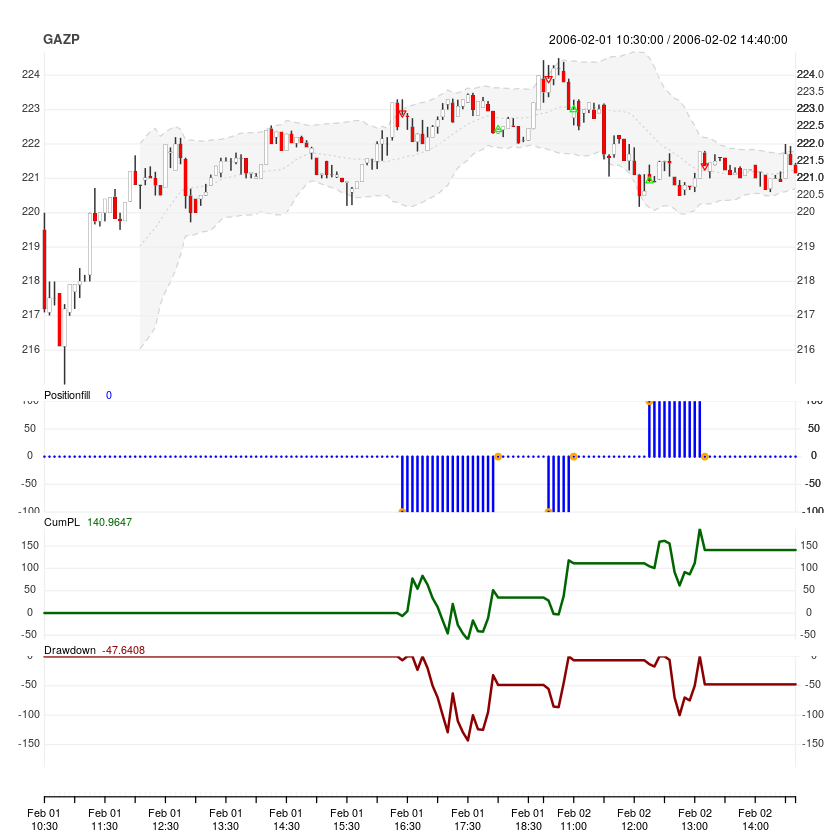

In [10]:
chart.Posn(Portfolio = nm, TA = "add_BBands()")